In [1]:
import numpy as np
import scipy.stats
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
feature_data = '/glade/work/hardt/ds612/2000-2013_June-Sept_CTRLradrefl_REFL.nc'
label_data   = '/glade/work/hardt/ds612/2000-2013_June-Sept_CTRL3D_maxW.nc'

In [3]:
xds = xr.open_dataset(feature_data)
yds = xr.open_dataset(label_data)
refl = xds.refl.values
maxW = yds.maxW.values

In [4]:
print(refl.shape)

(9568, 256, 256)


In [5]:
full_maxw_hist = np.histogram(maxW, bins=500)
full_maxw_dist = scipy.stats.rv_histogram(full_maxw_hist)

full_refl_hist = np.histogram(refl,bins=500)
full_refl_dist = scipy.stats.rv_histogram(full_refl_hist)

In [76]:
print(full_refl_dist.cdf(0))

0.9367271890563795


<Figure size 432x288 with 0 Axes>

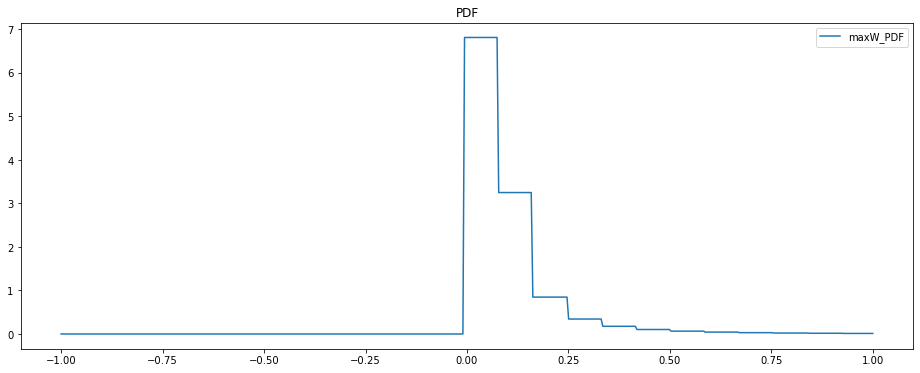

In [77]:
FLS = np.linspace(-1, 1, 500)

plt.clf()
plt.figure(figsize=(16, 6))
plt.title("PDF")
#plt.xlim(-1,10)
plt.plot(FLS, full_maxw_dist.pdf(FLS), label='maxW_PDF')
#plt.plot(FLS, full_refl_dist.cdf(FLS), label='ref_CDF')
#plt.plot(LS, hist_dist.cdf(FLS), label='CDF')
plt.legend()
plt.show()

In [78]:
x = maxW.copy()
y = refl.copy()
print(x.shape, y.shape)

(9568, 256, 256) (9568, 256, 256)


In [79]:
x[(maxW<0.1)&(refl<25)]=-999
y[(maxW<0.1)&(refl<25)]=-999

#x = x[(maxW>=0.1)&(refl>=25)]
#y = y[(maxW>=0.1)&(refl>=25)]

x = (x - np.amin(x)) / (np.amax(x) - np.amin(x) )
y = (y - np.amin(y)) / (np.amax(y) - np.amin(y) )

#x=x[(refl>=35)]
#y=y[(refl>=35)]

print(x.shape, y.shape)

(9568, 256, 256) (9568, 256, 256)


In [80]:
#r = np.corrcoef(x, y)
r = np.corrcoef(x.flatten(), y.flatten())

In [81]:
print(r)

[[1.         0.99966487]
 [0.99966487 1.        ]]


In [84]:
print(np.corrcoef(maxW.flatten(),refl.flatten()))

[[1.         0.36611514]
 [0.36611514 1.        ]]


In [12]:
maxw_hist = np.histogram(x, bins=500)
maxw_dist = scipy.stats.rv_histogram(maxw_hist)

refl_hist = np.histogram(y,bins=500)
refl_dist = scipy.stats.rv_histogram(refl_hist)

In [13]:
print(refl_dist.cdf(35))
print(maxw_dist.cdf(0))

1.0
0.0


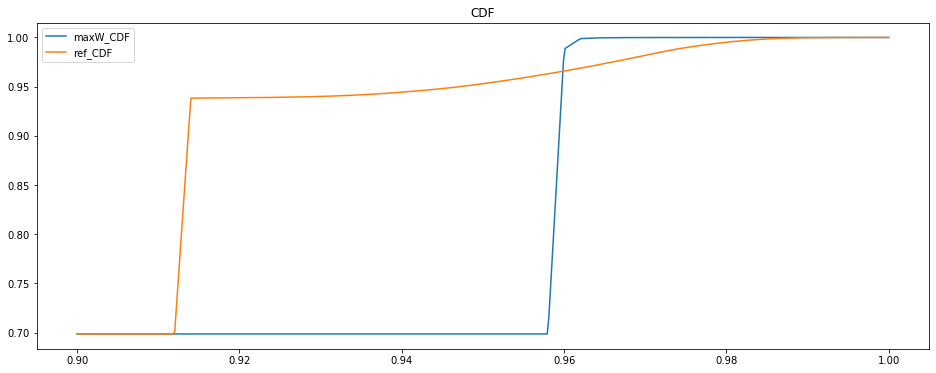

In [18]:
LS = np.linspace(.9, 1, 500)

plt.figure(figsize=(16, 6))
plt.title("CDF")
#plt.xlim(-1,10)
#hist = plt.hist(x, density=True, bins=100)
plt.plot(LS, maxw_dist.cdf(LS), label='maxW_CDF')
plt.plot(LS, refl_dist.cdf(LS), label='ref_CDF')
#plt.plot(LS, hist_dist.cdf(LS), label='CDF')
plt.legend()
plt.show()